In [46]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4
import matplotlib.colors as colors

In [47]:
data = xr.open_dataset('./data/SCHISM_SNS_surfTSC_2020.nc')
type(data)
# print(data)

#change the variable name
data = data.rename({"TSC g per l": "SPM"})

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

print(data)




data.SPM.values  min 0.0 and max 1.7996469736099243
<xarray.Dataset>
Dimensions:    (time: 330, lon: 1151, lat: 601)
Coordinates:
  * time       (time) float64 7.378e+05 7.378e+05 ... 7.381e+05 7.381e+05
Dimensions without coordinates: lon, lat
Data variables:
    longitude  (lon, lat) float64 ...
    latitude   (lon, lat) float64 ...
    SPM        (time, lon, lat) float32 nan nan nan nan nan ... nan nan nan nan
    mask       (lon, lat) float32 ...


In [48]:
#change long and latitude format

# Create new longitude and latitude dimensions
new_lon = np.linspace(np.nanmin(data.longitude.values), np.nanmax(data.longitude.values), 1151)  # Replace start_lon and end_lon with your desired range
new_lat = np.linspace(np.nanmax(data.latitude.values), np.nanmin(data.latitude.values), 601)   # Replace start_lat and end_lat with your desired range

# Initialize a new DataArray with the expanded dimensions
# Note: You need to decide how to initialize this array, here I'm using NaNs
new_spm = xr.DataArray(data.SPM, coords=[data['time'], new_lon, new_lat], dims=['time', 'lon', 'lat'])

# Assign this new DataArray to your dataset
data['SPM'] = (new_spm+0.0001)*1000

# Now your dataset should have the desired dimensions and coordinates
print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

<xarray.Dataset>
Dimensions:    (time: 330, lon: 1151, lat: 601)
Coordinates:
  * time       (time) float64 7.378e+05 7.378e+05 ... 7.381e+05 7.381e+05
  * lon        (lon) float64 -1.651 -1.641 -1.63 -1.62 ... 10.31 10.32 10.33
  * lat        (lat) float64 56.05 56.04 56.03 56.02 ... 49.83 49.82 49.81 49.8
Data variables:
    longitude  (lon, lat) float64 -1.651 -1.651 -1.651 ... 10.33 10.33 10.33
    latitude   (lon, lat) float64 56.05 56.04 56.03 56.02 ... 49.82 49.81 49.8
    SPM        (time, lon, lat) float32 nan nan nan nan nan ... nan nan nan nan
    mask       (lon, lat) float32 ...
data.SPM.values  min 0.09999999403953552 and max 1799.7469482421875


In [49]:
# Transpose only the 'SPM' DataArray within the dataset
data['SPM'] = data['SPM'].transpose('time', 'lat', 'lon')

print(data['SPM'])

<xarray.DataArray 'SPM' (time: 330, lat: 601, lon: 1151)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, .

In [50]:
# rescaling data by log10
data['SPM'] = np.log10(data['SPM'])

# Now your dataset should have the desired dimensions and coordinates
print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

<xarray.Dataset>
Dimensions:    (time: 330, lon: 1151, lat: 601)
Coordinates:
  * time       (time) float64 7.378e+05 7.378e+05 ... 7.381e+05 7.381e+05
  * lon        (lon) float64 -1.651 -1.641 -1.63 -1.62 ... 10.31 10.32 10.33
  * lat        (lat) float64 56.05 56.04 56.03 56.02 ... 49.83 49.82 49.81 49.8
Data variables:
    longitude  (lon, lat) float64 -1.651 -1.651 -1.651 ... 10.33 10.33 10.33
    latitude   (lon, lat) float64 56.05 56.04 56.03 56.02 ... 49.82 49.81 49.8
    SPM        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mask       (lon, lat) float32 ...
data.SPM.values  min -1.0 and max 3.255211353302002


In [51]:
#change date format
import pandas as pd
time_period=pd.date_range('1-2-2020', periods=330, freq='D')

# Assuming 'data' is your xarray.Dataset and you have 330 time steps
data['time'] = time_period
# np.arange(330)  # This creates an array of integers from 0 to 329

# Check the updated dataset
print(data)


<xarray.Dataset>
Dimensions:    (time: 330, lon: 1151, lat: 601)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-11-26
  * lon        (lon) float64 -1.651 -1.641 -1.63 -1.62 ... 10.31 10.32 10.33
  * lat        (lat) float64 56.05 56.04 56.03 56.02 ... 49.83 49.82 49.81 49.8
Data variables:
    longitude  (lon, lat) float64 -1.651 -1.651 -1.651 ... 10.33 10.33 10.33
    latitude   (lon, lat) float64 56.05 56.04 56.03 56.02 ... 49.82 49.81 49.8
    SPM        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mask       (lon, lat) float32 ...


(601, 1151)
-1.0 3.2543364


/tmp/ipykernel_13006/323856231.py:5: RuntimeWarning: Mean of empty slice
  mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')


Text(0.5, 1.0, 'Mean of values')

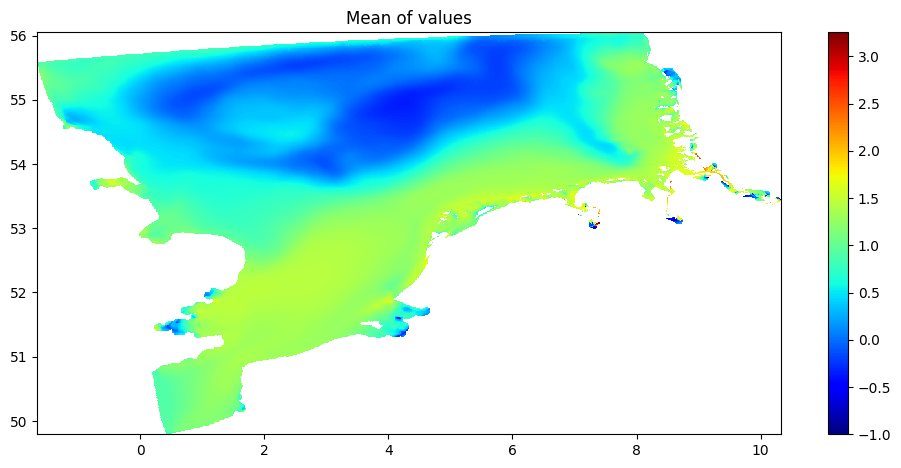

In [18]:
#visualize the mean of the data

nlat = data.lat.size
nlon = data.lon.size
mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')

vmin = np.nanmin(mean_tgt)
vmax = np.nanmax(mean_tgt)

print(mean_tgt.shape)
print(vmin,vmax)
fig=plt.figure(figsize=[10+2, 10*(nlat/nlon)])
plt.pcolormesh( data.lon,data.lat, mean_tgt, cmap='jet',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Mean of values')

In [53]:
# Specify the range of longitude and latitude
lon_min, lon_max = 6.37, 9.5
lat_min, lat_max =  55.11, 52.61

# Crop the data using .sel method
data_cropped = data.SPM.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Check the cropped data
print(data_cropped)


# Create and Save a new Dataset
new_data = xr.Dataset({
    'SPM': data_cropped
})

print(new_data)


<xarray.DataArray 'SPM' (time: 330, lat: 240, lon: 300)>
array([[[0.14774112, 0.15764765, 0.16733362, ...,        nan,
                nan,        nan],
        [0.15541494, 0.16529533, 0.1749564 , ...,        nan,
                nan,        nan],
        [0.16270639, 0.17242411, 0.18192962, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.06279905, 0.07544765, 0.08773886, ...,        nan,
                nan,        nan],
        [0.06989304, 0.08273216, 0.09520316, ...,        nan,
                nan,        nan],
        [0.07620034, 0.08885701, 0.10115578, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan

(240, 300)
-1.0 3.2543364


/tmp/ipykernel_13006/2900816204.py:2: RuntimeWarning: Mean of empty slice
  mean_tgt = np.nanmean(new_data.SPM, axis=0)#.sel(time='2017')


Text(0.5, 1.0, 'Mean of values')

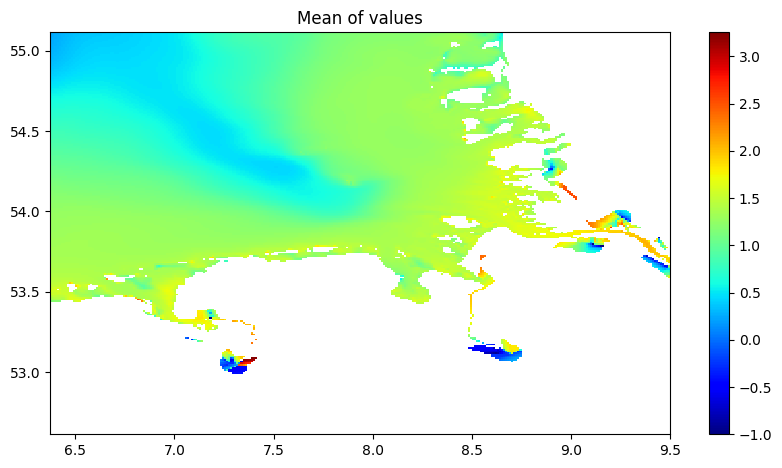

In [54]:
#Visualize the mean of the whole data
mean_tgt = np.nanmean(new_data.SPM, axis=0)#.sel(time='2017')
print(mean_tgt.shape)

vmin = np.nanmin(mean_tgt)
vmax = np.nanmax(mean_tgt)

print(vmin,vmax)
fig=plt.figure(figsize=[10, 10*(nlat/nlon)])
plt.pcolormesh( new_data.lon,new_data.lat, mean_tgt, cmap='jet',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Mean of values')



In [55]:
#: Write the modified dataset to a new NetCDF file
new_dataset=new_data
new_dataset.to_netcdf('./data/data_cropped_SCHISM_Nga.nc')
print('np.unique', np.unique(new_dataset.SPM.values))

np.unique [-1.         -0.99999994 -0.9999999  ...  3.2549782   3.2552114
         nan]


In [56]:
########################
##### land mask ########
########################
mask = np.where(np.isnan(new_dataset.SPM.values), 0., 1.)
print('mask.shape',mask.shape)
nt = len(new_dataset.time)
print('nt: ', nt)
#print('mask: ', mask)
land_mask = np.float64(np.sum(mask==0,0)==nt)#axis=0 of the numpy.sum, land_mask shape (78,289) contains 0 and 1, 1 only at the place when all time-series x is NOT nan at that pixel
print('land_mask.shape',land_mask.shape)
land_mask[np.where(land_mask==0)] = np.nan
land_mask = xr.DataArray(land_mask,name="mask",coords=[new_dataset.lat,new_dataset.lon],dims=['lat','lon'])
print('land_mask after format as Xarray: ', land_mask)

#this 2 below is just to save the file containing land_mask
land_mask_file = './data/land_mask_SCHISM_Nga.nc'
land_mask.to_netcdf(land_mask_file)

mask.shape (330, 240, 300)
nt:  330
land_mask.shape (240, 300)
land_mask after format as Xarray:  <xarray.DataArray 'mask' (lat: 240, lon: 300)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])
Coordinates:
  * lat      (lat) float64 55.11 55.1 55.09 55.08 ... 52.65 52.64 52.63 52.62
  * lon      (lon) float64 6.38 6.391 6.401 6.411 ... 9.464 9.474 9.484 9.495


In [57]:
#create obs_patches by removed patches 
##########################
#### Patch (from 0 to 50%) Obs. ####
##########################


# ~ lat_min = 52.5
# land_mask = land_mask.values#note that land_mask contains only 0 and 1

lon = new_dataset.lon
lat = new_dataset.lat

n_land_pix = np.nansum(land_mask)# sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.==> number of 1-pixels
n_sea_pix = land_mask.size-n_land_pix# numbe of 0-pixels

np.random.seed(10)
for t in range(new_dataset.time.size):
    mask_patch = np.where(np.isnan(new_dataset.SPM[t].values),np.nan,1)#mask_patch contains only nan and 1, nan at places that SPM values is nan, and 1 otherwise

    #p_mv is the ratio of nan-pixels to sea-pixels, so if it's bigger than 0.75, then we need to cover more sea-pixels with nan-pixels
    p_mv = 1-np.nansum(mask_patch)/n_sea_pix# "np.nansum(mask_patch)/n_sea_pix" Oh, is it a problem here? n_sea_pix is to count #nan in all series, and np.nansum(mask_patch) is to count #NOT nan in the current x_t
    if p_mv <= .75:#i.e, np.nansum(mask_patch)/n_sea_pix bigger than 0.25!! Otherwise, no need to do anything since it is already too small (smaller than 0.25) !!!
        obj_p_mv = 1-.5*(np.nansum(mask_patch)/n_sea_pix)
        while p_mv <= obj_p_mv:#this one is always true since p_mv is always smaller than obj_p_mv
            half_patch_height = np.random.randint(2,10)
            idx_lat = np.random.randint(0,lat.size)
            idx_lon = np.random.randint(0,lon.size)
            mask_patch[np.max([0,idx_lat-half_patch_height]):np.min([lat.size,idx_lat+half_patch_height+1]),np.max([0,idx_lon-half_patch_height]):np.min([lon.size,idx_lon+half_patch_height+1])] = np.nan
            p_mv = 1-np.nansum(mask_patch)/n_sea_pix
                
    new_var = new_dataset.SPM[t].values
    new_var[np.where(np.isnan(mask_patch))] = np.nan

    new_dataset.SPM[t].values = new_var


new_dataset.to_netcdf('./data/Obs_patch_SCHISM_Nga.nc')

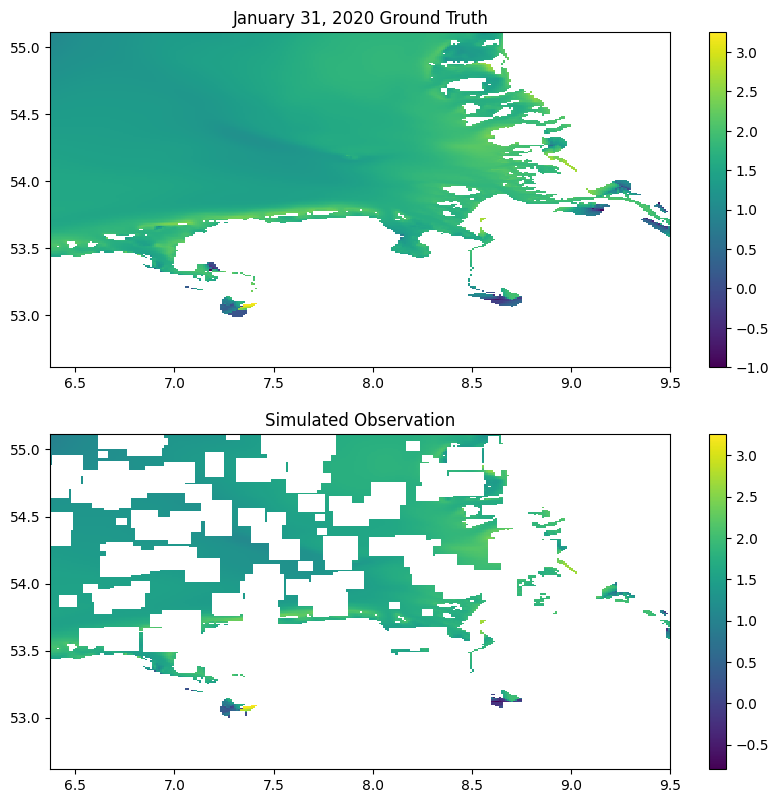

In [59]:
#plot several days only, instead of the animation on whole month
GT = xr.open_dataset('./data/data_cropped_SCHISM_Nga.nc')

data_month=GT#.sel(time=year)#+"-"+month)
Obs_month=new_dataset#.sel(time=year)#+"-"+month)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[2*5, 5*(nlon/nlat)])

t = 29  # Example time index

# Plot for the Ground Truth
mappable0 = ax0.pcolormesh(data_month.lon, data_month.lat, data_month.SPM[t])
ax0.pcolormesh(data_month.lon, data_month.lat, land_mask, cmap='Greys')
ax0.set_title(data_month.time[t].dt.strftime("%B %d, %Y").values + " Ground Truth")
fig.colorbar(mappable0, ax=ax0)  # Create a colorbar for the first subplot

# Plot for the Simulated Observation
mappable1 = ax1.pcolormesh(data_month.lon, data_month.lat, Obs_month.SPM[t])
ax1.pcolormesh(data_month.lon, data_month.lat, land_mask, cmap='Greys')
ax1.set_title("Simulated Observation")
fig.colorbar(mappable1, ax=ax1)  # Create a colorbar for the second subplot

plt.show()  # Display the plot


In [65]:
#visualize the test reconstructions, you do it only when you finish training and get your test_data.nc

data = xr.open_dataset(
    "/home/t23nguye/Documents/Data_CMEMS/SCHISM_SPM/data/SCHISM_data_Nga_30eps/"
    + "test_data.nc"
)

data=data#.sel(time=slice("2017-11-01","2017-12-31"))
print(data)
mask_no_obs_kd = (1 - np.isnan(data.tgt)) * (
    np.isnan(data.inp)
)  # (1 - np.isnan(data.tgt)) equal to 1 if there is observation and 0 if there is no observation, np.isnan(data.inp)
# equal to 1 if there is cloud coverage (including the simulated cloud), so mask_no_obs_kd equal to 1 if there is observation and cloud coverage,
# so it means we measure only on pixels which are missing in the input compared to groundtruth
mask_no_obs_kd = np.where(mask_no_obs_kd == 1, True, False)
print("mask_no_obs_kd.shape", mask_no_obs_kd.shape)

predict_dineof_kd = data.out.values[mask_no_obs_kd]
obs_kd = data.tgt.values[mask_no_obs_kd]
print("data.tgt shape", data.tgt.shape)
print("obs_kd shape", obs_kd.shape)

nlat = data.lat.size
nlon = data.lon.size

<xarray.Dataset>
Dimensions:  (time: 57, lat: 240, lon: 300)
Coordinates:
  * time     (time) datetime64[ns] 2020-10-01 2020-10-02 ... 2020-11-26
  * lat      (lat) float64 55.11 55.1 55.09 55.08 ... 52.65 52.64 52.63 52.62
  * lon      (lon) float64 6.38 6.391 6.401 6.411 ... 9.464 9.474 9.484 9.495
Data variables:
    inp      (time, lat, lon) float64 ...
    tgt      (time, lat, lon) float64 ...
    out      (time, lat, lon) float64 ...
mask_no_obs_kd.shape (57, 240, 300)
data.tgt shape (57, 240, 300)
obs_kd shape (953083,)


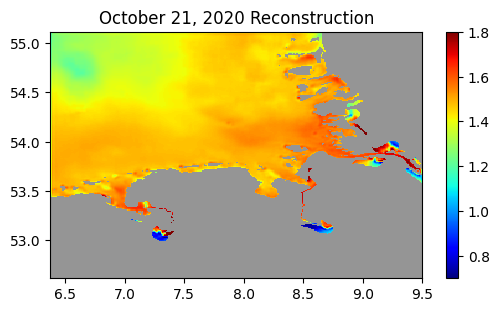

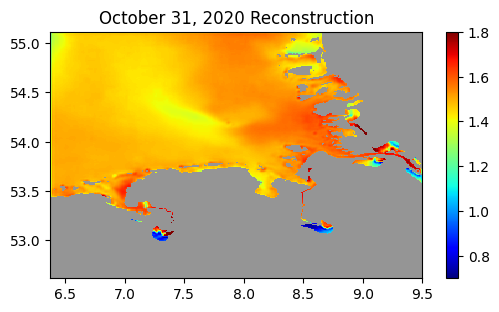

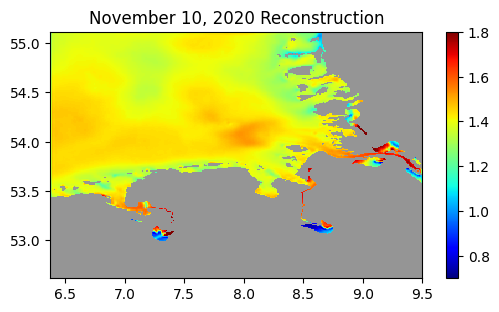

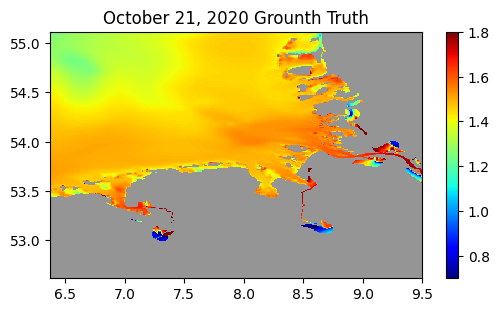

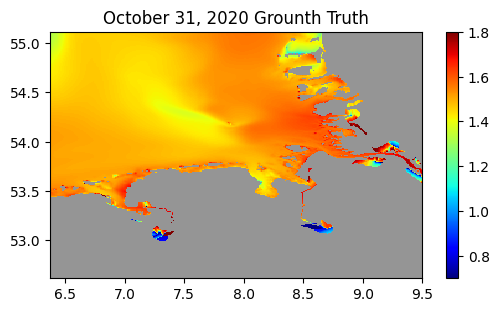

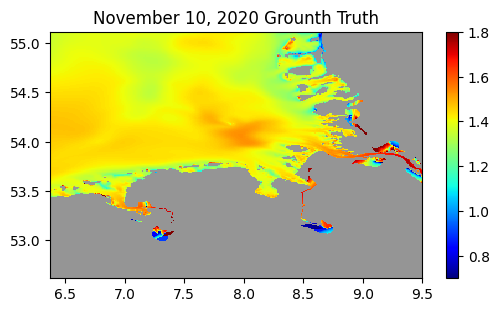

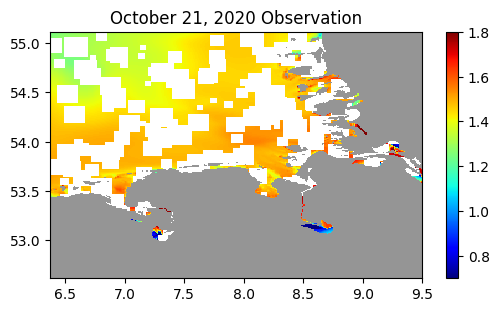

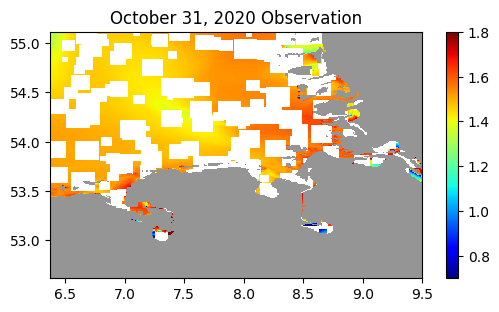

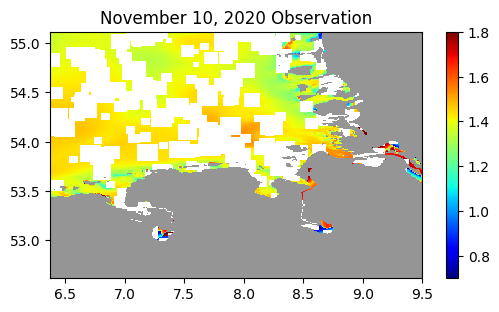

In [68]:
#To plot the reconstruction, the grouth truth and obervation to compare visually

rang_min=20
rang_max=rang_min+30
step=10

# Slicing the longitude and latitude arrays
lon = data.lon
lat = data.lat

# transpose land_mask
land_mask_transposed = land_mask.transpose('lat', 'lon')

# print(data.out[i])
v_min=np.min(data.tgt[rang_min:rang_max])
v_max=np.max(data.tgt[rang_min:rang_max])
#draw some examples of the Reconstruction
for i in range(rang_min,rang_max,step):
    fig, ax = plt.subplots(figsize=[4 + 2, 4 * (data.lat.shape[0] / data.lon.shape[0])])  # Create a figure and an axes object
    c = ax.pcolormesh(lon, lat, data.out[i], cmap='jet', vmin=v_min, vmax=v_max)
    ax.pcolormesh(data.lon,data.lat, land_mask_transposed, cmap='Greys', vmin=0, vmax = 2)
    ax.set_title(data.time[i].dt.strftime("%B %d, %Y").values + " Reconstruction")  # Set the title on the axes object
    fig.colorbar(c, ax=ax)  # Add a colorbar to the figure based on the plot

    plt.show()  # Display the plot

#draw some examples of the Grouth Truth in test_data.nc file
for i in range(rang_min,rang_max,step):
    fig, ax = plt.subplots(figsize=[4 + 2, 4 * (data.lat.shape[0] / data.lon.shape[0])])  # Create a figure and an axes object
    c = ax.pcolormesh(lon, lat, data.tgt[i], cmap='jet', vmin=v_min, vmax=v_max)
    ax.pcolormesh(data.lon,data.lat, land_mask_transposed, cmap='Greys', vmin=0, vmax = 2)
    ax.set_title(data.time[i].dt.strftime("%B %d, %Y").values + " Grounth Truth")  # Set the title on the axes object
    fig.colorbar(c, ax=ax)  # Add a colorbar to the figure based on the plot

    plt.show()  # Display the plot

#draw some examples of the Grouth Truth in test_data.nc file
for i in range(rang_min,rang_max,step):
    fig, ax = plt.subplots(figsize=[4 + 2, 4 * (data.lat.shape[0] / data.lon.shape[0])])  # Create a figure and an axes object
    c = ax.pcolormesh(lon, lat, data.inp[i], cmap='jet', vmin=v_min, vmax=v_max)
    ax.pcolormesh(data.lon,data.lat, land_mask_transposed, cmap='Greys', vmin=0, vmax = 2)
    ax.set_title(data.time[i].dt.strftime("%B %d, %Y").values + " Observation")  # Set the title on the axes object
    fig.colorbar(c, ax=ax)  # Add a colorbar to the figure based on the plot

    plt.show()  # Display the plot

min is -1.0 and max is 3.255211353302002
min of SPM date 2020-04-06 is -1.0 and max is 3.2542004585266113


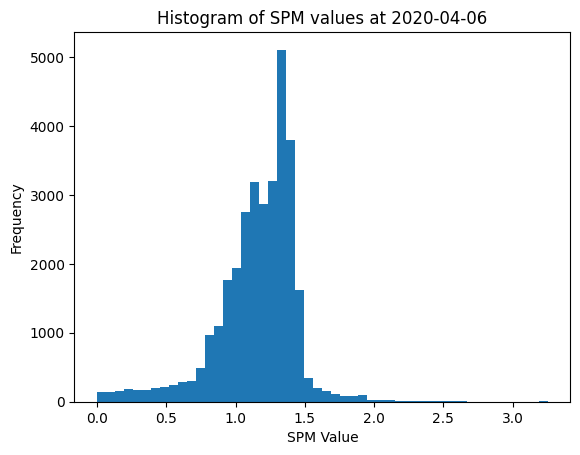

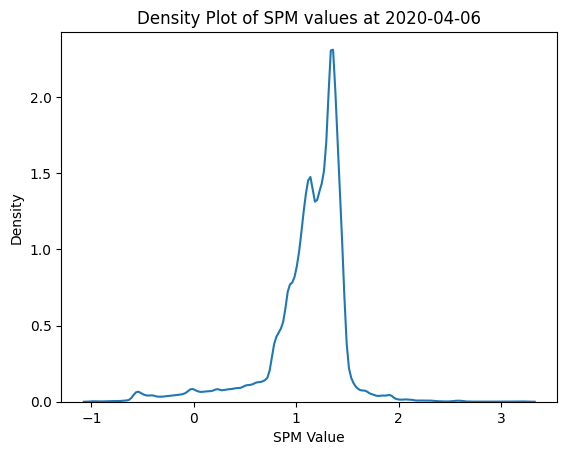

In [64]:

#To plot the histogram and density of data


#Step 1: Load the dataset
data = xr.open_dataset('./data/data_cropped_SCHISM_Nga.nc')


# Step 2: rescale if needed, maybe indentity if not need rescaling
data_standardized = data.SPM

print(f'min is {np.nanmin(data_standardized)} and max is {np.nanmax(data_standardized)}')



#Step 3: Then plot histogram and density for one selected day

# Selecting data for a specific time point
specific_time = '2020-04-06'
spm_values = data_standardized.sel(time=specific_time).values.flatten()

print(f'min of SPM date {specific_time} is {np.nanmin(spm_values)} and max is {np.nanmax(spm_values)}')

# Ignore NaN values for the histogram
spm_values_nonan = spm_values[~np.isnan(spm_values)]

# Plot histogram
plt.hist(spm_values, bins=50, range=[0, spm_values_nonan.max()])  # Adjust the range and bins as needed
plt.title(f'Histogram of SPM values at {specific_time}')
plt.xlabel('SPM Value')
plt.ylabel('Frequency')
plt.show()

# Using seaborn for density plot, does not work!!!! Removed!!!
import seaborn as sns

sns.kdeplot(spm_values, bw_adjust=0.5)  # Adjust bandwidth as needed
plt.title(f'Density Plot of SPM values at {specific_time}')
plt.xlabel('SPM Value')
plt.ylabel('Density')
plt.show()
